In [1]:
import pandas as pd

orders = pd.read_csv("Customers_Orders_Data.csv")

orders['order_date'] = pd.to_datetime(orders['order_date'], dayfirst=True, errors='coerce')

sale_periods = [
    (pd.to_datetime("18-07-2023", format="%d-%m-%Y"), pd.to_datetime("19-07-2023", format="%d-%m-%Y")),
    (pd.to_datetime("15-08-2023", format="%d-%m-%Y"), pd.to_datetime("17-08-2023", format="%d-%m-%Y")),
    (pd.to_datetime("28-08-2023", format="%d-%m-%Y"), pd.to_datetime("30-08-2023", format="%d-%m-%Y")),
    (pd.to_datetime("15-10-2023", format="%d-%m-%Y"), pd.to_datetime("17-10-2023", format="%d-%m-%Y")),  # corrected 15–17 Oct
    (pd.to_datetime("07-11-2023", format="%d-%m-%Y"), pd.to_datetime("14-11-2023", format="%d-%m-%Y")),
    (pd.to_datetime("25-12-2023", format="%d-%m-%Y"), pd.to_datetime("03-01-2024", format="%d-%m-%Y")),  # crosses year boundary
    (pd.to_datetime("20-01-2024", format="%d-%m-%Y"), pd.to_datetime("22-01-2024", format="%d-%m-%Y")),
    (pd.to_datetime("01-02-2024", format="%d-%m-%Y"), pd.to_datetime("02-02-2024", format="%d-%m-%Y")),
    (pd.to_datetime("14-02-2024", format="%d-%m-%Y"), pd.to_datetime("15-02-2024", format="%d-%m-%Y")),
    (pd.to_datetime("20-02-2024", format="%d-%m-%Y"), pd.to_datetime("21-02-2024", format="%d-%m-%Y")),
    (pd.to_datetime("07-03-2024", format="%d-%m-%Y"), pd.to_datetime("09-03-2024", format="%d-%m-%Y")),
    (pd.to_datetime("25-05-2024", format="%d-%m-%Y"), pd.to_datetime("27-05-2024", format="%d-%m-%Y"))
]

def is_in_sale_period(order_dt, sale_ranges):
    for start_dt, end_dt in sale_ranges:
        if start_dt <= order_dt <= end_dt:
            return True
    return False

orders['in_sale'] = orders['order_date'].apply(
    lambda d: 1 if is_in_sale_period(d, sale_periods) else 0
)

<ipython-input-1-47643395ac1e>:3: DtypeWarning: Columns (5,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv("/content/drive/MyDrive/GC Data/Submission/Customers_Orders_Data.csv")
<ipython-input-1-47643395ac1e>:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  orders['order_date'] = pd.to_datetime(orders['order_date'], dayfirst=True, errors='coerce')


In [2]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['order_date_only'] = orders['order_date'].dt.date
orders['order_time'] = orders['order_date'].dt.time
orders['order_date'] = orders['order_date'].astype(str)
orders['order_time'] = orders['order_time'].astype(str)



In [3]:
orders = orders.sort_values(by=['order_date_only', 'order_time'], ascending=[True, True])

In [4]:
orders.to_csv("added_sale.csv")


In [5]:
# Read the SKU details file
sku_details = pd.read_csv("SKU_details.csv")

orders = pd.read_csv("added_sale.csv")

# Merge orders with SKU details based on fsn_id
merged_data = pd.merge(orders, sku_details, on='fsn_id', how='left')

# Display the first few rows of the merged dataset
print("Merged data shape:", merged_data.shape)
merged_data.head()


<ipython-input-5-8fda2db230b4>:4: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv("added_sale.csv")


Merged data shape: (1648824, 23)


,Unnamed: 0.1,Unnamed: 0,fsn_id,order_date,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,pincode,product_mrp,product_procurement_sla,in_sale,order_date_only,order_time,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
0,1376093,1376093,ACCDVZ83VBHCWFFA,2023-05-19 13:42:09,146499482.0,188485029.0,3149,1,\N,\N,...,-3.21775258155408E+018,6990,4,0,2023-05-19,13:42:09,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,1436634,1436634,VGLE4VR7XSQKYFG7,2023-06-11 18:21:50,155827856.0,198823138.0,275,1,\N,\N,...,-3.70342091330123E+017,600,2,0,2023-06-11,18:21:50,CE,EntertainmentSmall,TVVideoSmall,VideoGlasses
2,1398258,1398258,ACCE6VGHYKYFX4WB,2023-06-24 10:20:16,161931009.0,205976637.0,188,1,\N,\N,...,2.04427084691886E+018,310,-1,0,2023-06-24,10:20:16,CE,EntertainmentSmall,Speaker,LaptopSpeaker
3,1385002,1385002,ACCE2V5DUDZVGFRK,2023-06-25 16:28:12,163016530.0,207267972.0,250,1,\N,\N,...,6.14822284391839E+018,400,4,0,2023-06-25,16:28:12,CE,EntertainmentSmall,Speaker,LaptopSpeaker
4,1358453,1358453,ACCDFZEJ6ZGSWRMK,2023-06-26 17:02:01,163400507.0,207701702.0,1119,1,\N,\N,...,-9.779010321304E+017,2500,3,0,2023-06-26,17:02:01,CE,EntertainmentSmall,Speaker,LaptopSpeaker


In [6]:
merged_data.drop(columns = [ 'Unnamed: 0.1', 'Unnamed: 0' , 'order_date' ] ,inplace = True)

In [7]:
merged_data.to_csv("added_sku_sale.csv")

In [8]:
merged_data.columns

Index(['fsn_id', 'order_id', 'order_item_id', 'gmv', 'units', 'deliverybdays',
       'deliverycdays', 'order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_mrp', 'product_procurement_sla', 'in_sale', 'order_date_only',
       'order_time', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical'],
      dtype='object')

In [9]:
df = pd.read_csv("added_sku_sale.csv")

df['order_date_only'] = pd.to_datetime(df['order_date_only'])

holidays_data = {
    'Occasion': [
        'Canada Day', 'Civic Holiday', 'Labour Day', 'Thanksgiving', 'Halloween',
        'Remembrance Day', 'Christmas Day', 'Boxing Day', 'New Year\'s Day', 'Islander Day',
        'Louis Riel Day', 'Heritage Day', 'Family Day', 'Valentine\'s Day', 'Leap Day',
        'St. Patrick\'s Day', 'Good Friday', 'Easter Monday', 'Mother\'s Day',
        'Victoria Day', 'Father\'s Day', 'Aboriginal Day', 'St. Jean Baptiste Day'
    ],
    'Day': [
        '2023-07-01', '2023-08-07', '2023-09-04', '2023-10-09', '2023-10-31',
        '2023-11-11', '2023-12-25', '2023-12-26', '2024-01-01', '2024-02-15',
        '2024-02-15', '2024-02-15', '2024-02-15', '2024-02-14', '2024-02-29',
        '2024-03-17', '2024-03-25', '2024-03-28', '2024-05-12',
        '2024-05-20', '2024-06-16', '2024-06-21', '2024-06-24'
    ]
}

holidays_df = pd.DataFrame(holidays_data)

holidays_df['Day'] = pd.to_datetime(holidays_df['Day'])

merged_with_holidays = pd.merge(
    df,
    holidays_df,
    left_on='order_date_only',
    right_on='Day',
    how='left'
)

print("Merged with holidays shape:", merged_with_holidays.shape)
merged_with_holidays.head()

<ipython-input-9-62469996bfee>:1: DtypeWarning: Columns (4,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("added_sku_sale.csv")


Merged with holidays shape: (1661607, 23)


,Unnamed: 0,fsn_id,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,order_payment_type,sla,...,product_procurement_sla,in_sale,order_date_only,order_time,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,Occasion,Day
0,0,ACCDVZ83VBHCWFFA,146499482.0,188485029.0,3149,1,\N,\N,COD,6,...,4,0,2023-05-19,13:42:09,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,NaN,NaT
1,1,VGLE4VR7XSQKYFG7,155827856.0,198823138.0,275,1,\N,\N,COD,8,...,2,0,2023-06-11,18:21:50,CE,EntertainmentSmall,TVVideoSmall,VideoGlasses,NaN,NaT
2,2,ACCE6VGHYKYFX4WB,161931009.0,205976637.0,188,1,\N,\N,COD,8,...,-1,0,2023-06-24,10:20:16,CE,EntertainmentSmall,Speaker,LaptopSpeaker,NaN,NaT
3,3,ACCE2V5DUDZVGFRK,163016530.0,207267972.0,250,1,\N,\N,COD,7,...,4,0,2023-06-25,16:28:12,CE,EntertainmentSmall,Speaker,LaptopSpeaker,NaN,NaT
4,4,ACCDFZEJ6ZGSWRMK,163400507.0,207701702.0,1119,1,\N,\N,COD,28,...,3,0,2023-06-26,17:02:01,CE,EntertainmentSmall,Speaker,LaptopSpeaker,NaN,NaT


In [10]:
merged_with_holidays["Occasion"].value_counts()

,count
Occasion,
Labour Day,7038
Remembrance Day,5130
Mother's Day,4867
Leap Day,4828
Boxing Day,4751
Victoria Day,4603
St. Patrick's Day,4549
New Year's Day,4504
Easter Monday,4275


In [11]:
merged_with_holidays.to_csv("added_sku_sale_holidays.csv")

In [12]:

df_with_holidays = pd.read_csv("added_sku_sale_holidays.csv")

# Extract month and year from order_date_only for merging
df_with_holidays['order_date_only'] = pd.to_datetime(df_with_holidays['order_date_only'])
df_with_holidays['month_year'] = df_with_holidays['order_date_only'].dt.strftime('%Y-%m')

# Create a dataframe from the stock index data in the image
stock_index_data = {
    'date': ['Jul 23', 'Aug 23', 'Sep 23', 'Oct 23', 'Nov 23', 'Dec 23', 'Jan 24', 'Feb 24', 'Mar 24', 'Apr 24', 'May 24', 'Jun 24'],
    'stock_index': [1177, 1206, 1101, 1210, 1233, 1038, 1052, 1222, 1015, 1242, 1228, 1194],  # Corrected Stock Index values from image
    'NPS': [54.6, 60.0, 46.9, 44.4, 47.0, 45.8, 47.1, 50.3, 49.0, 51.8, 47.3, 50.5]  # Corrected NPS values from image
}

# Create the stock index dataframe
stock_index_df = pd.DataFrame(stock_index_data)

# Convert the date strings to the same format as month_year
stock_index_df['month_year'] = stock_index_df['date'].apply(lambda x:
    '2023-' + x[:3].lower().replace('jul', '07').replace('aug', '08').replace('sep', '09')
    .replace('oct', '10').replace('nov', '11').replace('dec', '12') if '23' in x
    else '2024-' + x[:3].lower().replace('jan', '01').replace('feb', '02').replace('mar', '03')
    .replace('apr', '04').replace('may', '05').replace('jun', '06'))

# Drop the original date column
stock_index_df.drop('date', axis=1, inplace=True)

# Merge the dataframes on month_year
final_merged_df = pd.merge(
    df_with_holidays,
    stock_index_df,
    on='month_year',
    how='left'
)

# Drop the month_year column as it's no longer needed
final_merged_df.drop('month_year', axis=1, inplace=True)

# Display the first few rows of the final merged dataset
print("Final merged dataset shape:", final_merged_df.shape)
final_merged_df.head()

# Save the final merged dataset
final_merged_df.to_csv("added_sku_sale_holidays_stock.csv", index=False)


<ipython-input-12-b98cdd60cbac>:1: DtypeWarning: Columns (5,11,12,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_with_holidays = pd.read_csv("added_sku_sale_holidays.csv")


Final merged dataset shape: (1661607, 26)


In [13]:

final_merged_df= pd.read_csv("added_sku_sale_holidays_stock.csv")


<ipython-input-13-be1c4fdc8e8d>:1: DtypeWarning: Columns (5,11,12,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  final_merged_df= pd.read_csv("added_sku_sale_holidays_stock.csv")


In [14]:
# Extract the data from the image table showing advertising channel metrics
advertising_data = {
    'Year': [2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024],
    'Month': [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6],
    'Total_Investment': [17.1, 5.1, 96.3, 170.2, 51.2, 106.7, 74.2, 48.1, 100.0, 56.8, 78.1, 42.8],
    'TV': [0.2, 0.0, 3.9, 6.1, 4.2, 5.4, 4.4, 2.6, 9.3, 5.2, 1.4, 1.7],
    'Digital': [2.5, 1.3, 1.4, 12.6, 1.3, 3.1, 0.5, 1.9, 2.1, 0.9, 0.8, 1.4],
    'Sponsorship': [7.4, 1.1, 62.8, 84.7, 14.2, 56.7, 4.2, 11.7, 41.6, 24.3, 31.7, 25.0],
    'Content_Marketing': [0.0, 0.0, 0.6, 3.4, 0.2, 1.1, 0.9, 0.6, 0.6, 0.0, 0.0, 0.0],
    'Online_Marketing': [1.3, 0.1, 16.4, 24.4, 19.6, 22.5, 22.9, 19.9, 18.4, 16.5, 23.7, 8.0],
    'Affiliates': [0.5, 0.1, 5.0, 7.0, 6.6, 8.8, 7.4, 6.5, 6.2, 5.7, 6.8, 2.8],
    'SEM': [5.0, 2.5, 6.2, 31.9, 5.2, 11.2, 4.2, 4.9, 5.2, 4.2, 6.9, 3.7],
    'Radio': [None, None, None, None, None, None, 2.7, None, 0.9, None, 1.1, None],
    'Other': [None, None, None, None, None, None, 27.1, 15.9, None, 5.0, None, None]
}

advertising_df = pd.DataFrame(advertising_data)

advertising_df['date'] = pd.to_datetime(advertising_df[['Year', 'Month']].assign(Day=1))
advertising_df['month_year'] = advertising_df['date'].dt.strftime('%Y-%m')

advertising_df.drop('date', axis=1, inplace=True)

final_merged_df['order_date_only'] = pd.to_datetime(final_merged_df['order_date_only'])
final_merged_df['month_year'] = final_merged_df['order_date_only'].dt.strftime('%Y-%m')

# Now merge the advertising data with the final merged dataset
final_merged_with_advertising = pd.merge(
    final_merged_df,
    advertising_df,
    on='month_year',
    how='left'
)

# Drop the month_year column after merging if needed
final_merged_with_advertising.drop('month_year', axis=1, inplace=True)

# Display the first few rows of the dataset with advertising data
print("Final dataset with advertising metrics shape:", final_merged_with_advertising.shape)
final_merged_with_advertising.head()

# Save the complete dataset
final_merged_with_advertising.to_csv("added_sku_sale_holidays_stock_advertising.csv", index=False)


Final dataset with advertising metrics shape: (1661607, 38)


In [15]:
df = pd.read_csv("added_sku_sale_holidays_stock_advertising.csv")

<ipython-input-15-f9d359758a45>:1: DtypeWarning: Columns (5,11,12,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("added_sku_sale_holidays_stock_advertising.csv")


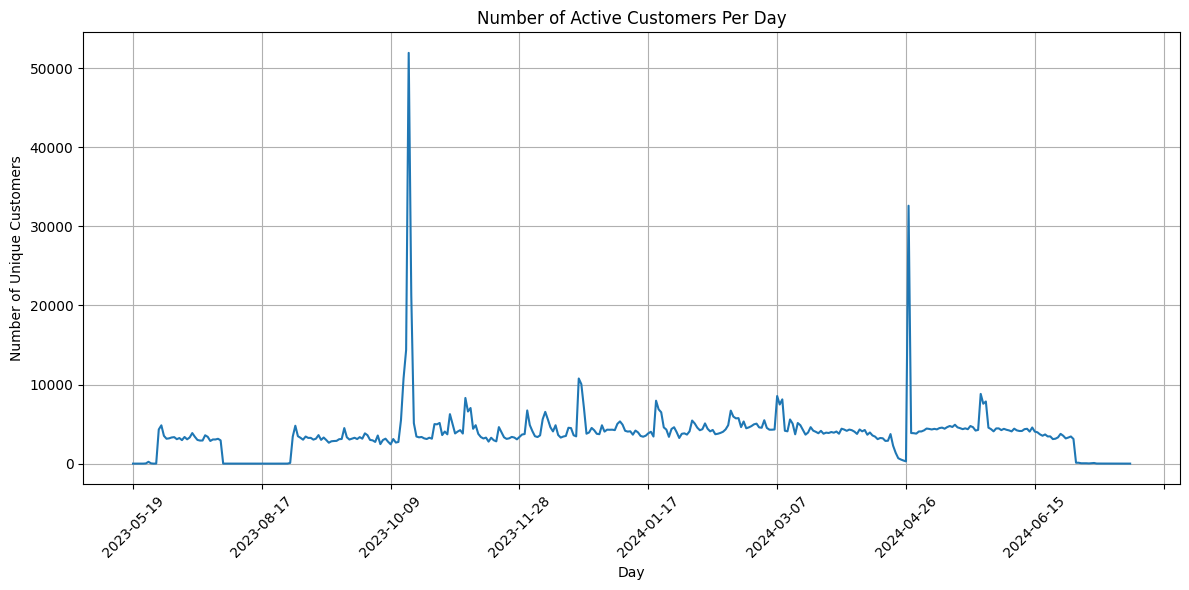

In [16]:
import matplotlib.pyplot as plt

df.groupby('order_date_only')['cust_id'].nunique().plot(kind='line', figsize=(12,6))
plt.title('Number of Active Customers Per Day')
plt.xlabel('Day')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

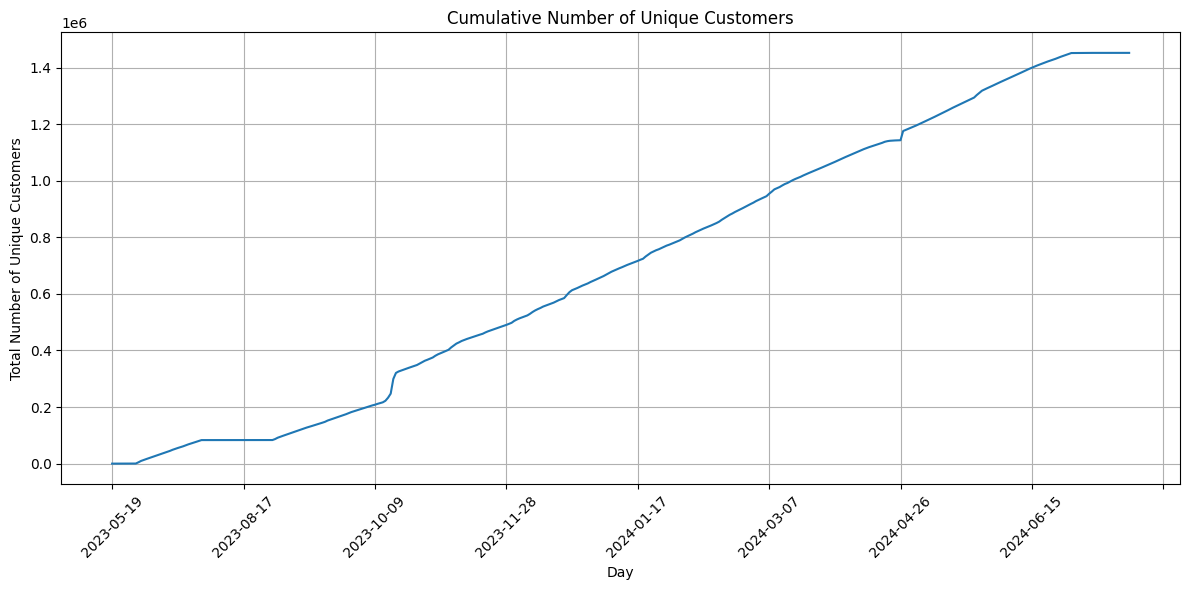

In [17]:
import matplotlib.pyplot as plt

df.groupby('order_date_only')['cust_id'].nunique().cumsum().plot(kind='line', figsize=(12,6))
plt.title('Cumulative Number of Unique Customers')
plt.xlabel('Day')
plt.ylabel('Total Number of Unique Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

In [18]:
df['gmv'] = pd.to_numeric(df['gmv'], errors='coerce')

In [19]:
gmv_threshold = df['gmv'].quantile(0.8)

df['product_type'] = df['gmv'].apply(lambda x: 'Luxury' if x > gmv_threshold else 'Mass-market')

Starting data preprocessing...
Data preprocessing completed!
Starting customer segmentation...
Customer segmentation completed!
Starting segment analysis...
Segment analysis completed!
Starting visualization...
Visualization completed!

Segment Sizes:
segment
Casual Shoppers               977746
Category Enthusiasts          217184
Discount-Driven Shoppers       33413
High-Value Loyal Customers     22757
Name: count, dtype: int64

Segment Analysis:
                            total_orders  total_spent  avg_order_value  \
segment                                                                  
Casual Shoppers                     1.01      2439.07          2439.06   
Category Enthusiasts                2.24      4689.63          2146.38   
Discount-Driven Shoppers            2.19      6459.91          2897.83   
High-Value Loyal Customers          5.27     20028.64          3616.98   

                            sale_ratio  super_category_diversity  \
segment                           

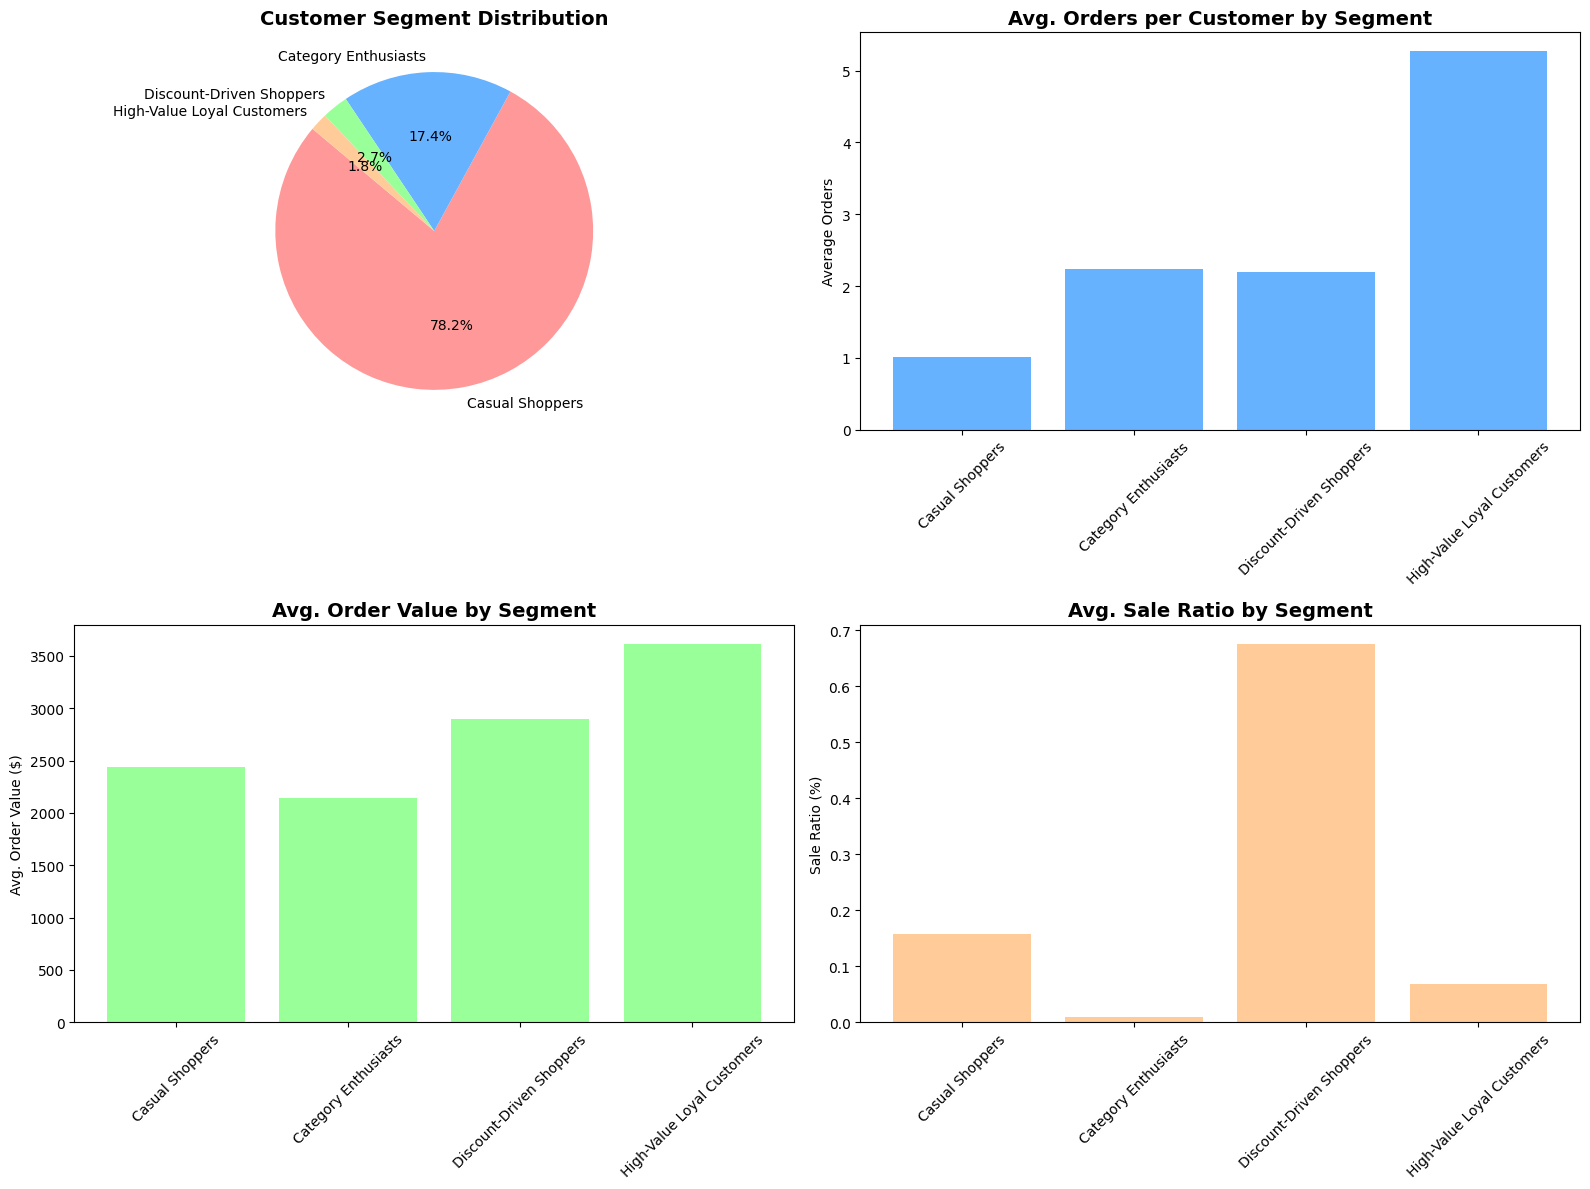

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class CustomerSegmentation:
    def __init__(self):
        self.customer_segments = None

    def preprocess_data(self, df):
        """
        Preprocess customer data by aggregating key shopping metrics.
        """
        print("Starting data preprocessing...")

        # Group by customer and compute relevant metrics
        customer_metrics = df.groupby('cust_id').agg({
            'order_id': 'count',  # Total number of orders
            'gmv': 'sum',  # Total spending
            'in_sale': 'mean',  # Ratio of sale purchases
            'product_analytic_super_category': lambda x: len(x.unique()),
            'product_analytic_category': lambda x: len(x.unique()),
            'product_analytic_sub_category': lambda x: len(x.unique()),
            'product_analytic_vertical': lambda x: len(x.unique()),
        }).reset_index()

        # Rename columns
        customer_metrics.columns = [
            'customer_id', 'total_orders', 'total_spent', 'sale_ratio',
            'super_category_diversity', 'category_diversity',
            'sub_category_diversity', 'vertical_diversity'
        ]

        # Compute average order value (AOV)
        customer_metrics['avg_order_value'] = customer_metrics['total_spent'] / customer_metrics['total_orders']

        print("Data preprocessing completed!")
        return customer_metrics

    def segment_customers(self, customer_metrics):
        """
        Assign customers to specific segments based on shopping behavior.
        """
        print("Starting customer segmentation...")

        def determine_segment(row):
            total_orders = row['total_orders']
            avg_order_value = row['avg_order_value']
            sale_ratio = row['sale_ratio']
            category_div = row['category_diversity']

            if total_orders >= 4 and avg_order_value > 500 and sale_ratio < 0.7:
                return 'High-Value Loyal Customers'

            elif sale_ratio > 0.4 and total_orders >= 2:
                return 'Discount-Driven Shoppers'

            elif category_div <= 3 and total_orders >= 2:
                return 'Category Enthusiasts'

            else:
                return 'Casual Shoppers'

        customer_metrics['segment'] = customer_metrics.apply(determine_segment, axis=1)
        self.customer_segments = customer_metrics

        print("Customer segmentation completed!")
        return customer_metrics

    def analyze_segments(self):
        """
        Generate segment insights and statistics.
        """
        print("Starting segment analysis...")

        if self.customer_segments is None:
            raise ValueError("Must run segment_customers first!")

        # Count number of customers in each segment
        segment_sizes = self.customer_segments['segment'].value_counts()

        # Aggregate segment characteristics
        segment_analysis = self.customer_segments.groupby('segment').agg({
            'total_orders': 'mean',
            'total_spent': 'mean',
            'avg_order_value': 'mean',
            'sale_ratio': 'mean',
            'super_category_diversity': 'mean',
            'category_diversity': 'mean',
            'vertical_diversity': 'mean'
        }).round(2)

        print("Segment analysis completed!")
        return segment_sizes, segment_analysis

    def visualize_segments(self):
        """
        Generate visualizations for segment insights.
        """
        print("Starting visualization...")

        if self.customer_segments is None:
            raise ValueError("Must run segment_customers first!")

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 1. Customer Segment Distribution (Pie Chart)
        segment_sizes = self.customer_segments['segment'].value_counts()
        colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
        axes[0, 0].pie(segment_sizes, labels=segment_sizes.index, autopct='%1.1f%%', colors=colors, startangle=140)
        axes[0, 0].set_title('Customer Segment Distribution', fontsize=14, fontweight='bold')

        # 2. Average Orders per Customer by Segment (Bar Plot)
        order_means = self.customer_segments.groupby('segment')['total_orders'].mean()
        axes[0, 1].bar(order_means.index, order_means.values, color='#66B2FF')
        axes[0, 1].set_title('Avg. Orders per Customer by Segment', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Average Orders')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # 3. Average Order Value by Segment (Bar Plot)
        aov_means = self.customer_segments.groupby('segment')['avg_order_value'].mean()
        axes[1, 0].bar(aov_means.index, aov_means.values, color='#99FF99')
        axes[1, 0].set_title('Avg. Order Value by Segment', fontsize=14, fontweight='bold')
        axes[1, 0].set_ylabel('Avg. Order Value ($)')
        axes[1, 0].tick_params(axis='x', rotation=45)

        # 4. Average Sale Ratio by Segment (Bar Plot)
        sale_means = self.customer_segments.groupby('segment')['sale_ratio'].mean()
        axes[1, 1].bar(sale_means.index, sale_means.values, color='#FFCC99')
        axes[1, 1].set_title('Avg. Sale Ratio by Segment', fontsize=14, fontweight='bold')
        axes[1, 1].set_ylabel('Sale Ratio (%)')
        axes[1, 1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        print("Visualization completed!")
        return fig

segmentation = CustomerSegmentation()

preprocessed_data = segmentation.preprocess_data(df)
segmented_customers = segmentation.segment_customers(preprocessed_data)
segment_sizes, segment_analysis = segmentation.analyze_segments()
visualization = segmentation.visualize_segments()

print("\nSegment Sizes:")
print(segment_sizes)
print("\nSegment Analysis:")
print(segment_analysis)
print("Main execution completed!")

plt.show()

In [21]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fsn_id', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays', 'order_payment_type',
       'sla', 'cust_id', 'pincode', 'product_mrp', 'product_procurement_sla',
       'in_sale', 'order_date_only', 'order_time',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'Occasion', 'Day', 'stock_index', 'NPS', 'Year', 'Month',
       'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_Marketing', 'Affiliates', 'SEM', 'Radio', 'Other',
       'product_type'],
      dtype='object')

<ipython-input-22-f0aefc9f0efc>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_time'])


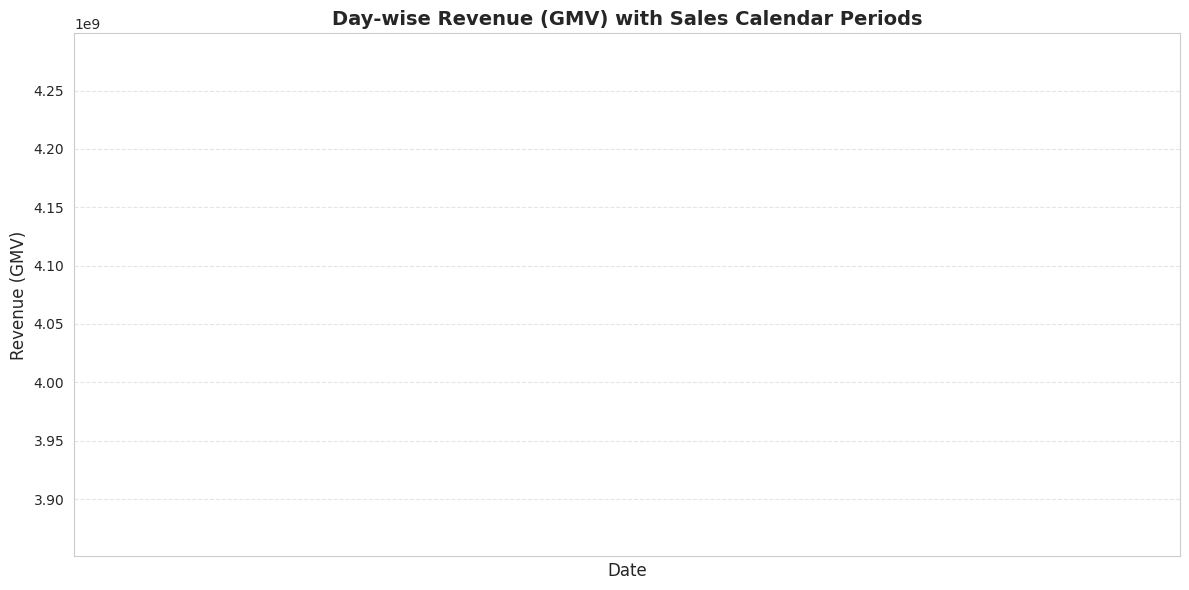

Daily Revenue Summary:


,order_date_only,gmv
0,2025-03-22,4.074938e+09


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# # Data preprocessing
df['order_date'] = pd.to_datetime(df['order_time'])
df['order_date_only'] = df['order_date'].dt.date
df['gmv'] = pd.to_numeric(df['gmv'], errors='coerce')

# Group by date and sum the GMV (revenue)
daily_revenue = df.groupby('order_date_only')['gmv'].sum().reset_index()

# Define sales calendar periods
sales_periods = [
    ('2023-07-18', '2023-07-19'),
    ('2023-08-15', '2023-08-17'),
    ('2023-08-28', '2023-08-30'),
    ('2023-10-15', '2023-10-17'),
    ('2023-11-07', '2023-11-14'),
    ('2023-12-25', '2024-01-03'),
    ('2024-01-20', '2024-01-22'),
    ('2024-02-01', '2024-02-02'),
    ('2024-02-20', '2024-02-21'),
    ('2024-02-14', '2024-02-15'),
    ('2024-03-07', '2024-03-09'),
    ('2024-05-25', '2024-05-27'),
]

# Create figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot full revenue data in light blue
sns.lineplot(data=daily_revenue, x='order_date_only', y='gmv',
             linestyle='-', alpha=0.4, color='#4682B4', linewidth=2)

# Highlight sales periods with a bold red line
for start_date, end_date in sales_periods:
    start = pd.to_datetime(start_date).date()
    end = pd.to_datetime(end_date).date()

    # Filter data for the period
    period_data = daily_revenue[
        (daily_revenue['order_date_only'] >= start) &
        (daily_revenue['order_date_only'] <= end)
    ]

    if not period_data.empty:
        sns.lineplot(data=period_data, x='order_date_only', y='gmv',
                     marker='o', linestyle='-', linewidth=3, color='red', alpha=0.8)

# Beautify plot
plt.title('Day-wise Revenue (GMV) with Sales Calendar Periods', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (GMV)', fontsize=12)
plt.xticks([], [])  # Remove x-axis labels (dates)
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

print("Daily Revenue Summary:")
display(daily_revenue)


## Budget Allocation

In [23]:
customer_order_data = pd.read_csv("added_discount_data.csv")

<ipython-input-23-b084c73ede32>:1: DtypeWarning: Columns (10,11,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_order_data = pd.read_csv("/content/drive/MyDrive/GC Data/Submission/added_discount_data.csv")


In [24]:
customer_order_data['order_date_only'] = pd.to_datetime(customer_order_data['order_date_only'])

In [25]:
investment_data = {
    'TV': {
        '2023-07': 0.2, '2023-08': 0.0, '2023-09': 3.9, '2023-10': 6.1,
        '2023-11': 4.2, '2023-12': 5.4, '2024-01': 4.4, '2024-02': 2.6,
        '2024-03': 9.3, '2024-04': 5.2, '2024-05': 1.4, '2024-06': 1.7
    },
    'Digital': {
        '2023-07': 2.5, '2023-08': 1.3, '2023-09': 1.4, '2023-10': 12.6,
        '2023-11': 1.3, '2023-12': 3.1, '2024-01': 0.5, '2024-02': 1.9,
        '2024-03': 2.1, '2024-04': 0.9, '2024-05': 0.8, '2024-06': 1.4
    },
    'Sponsorship': {
        '2023-07': 7.4, '2023-08': 1.1, '2023-09': 62.8, '2023-10': 84.7,
        '2023-11': 14.2, '2023-12': 56.7, '2024-01': 4.2, '2024-02': 11.7,
        '2024-03': 41.6, '2024-04': 24.3, '2024-05': 31.7, '2024-06': 25.0
    },
    'Content_Marketing': {
        '2023-07': 0.0, '2023-08': 0.0, '2023-09': 0.6, '2023-10': 3.4,
        '2023-11': 0.2, '2023-12': 1.1, '2024-01': 0.9, '2024-02': 0.6,
        '2024-03': 0.4, '2024-04': 0.0, '2024-05': 0.8, '2024-06': 0.0
    },
    'Online_Marketing': {
        '2023-07': 1.3, '2023-08': 0.1, '2023-09': 16.4, '2023-10': 24.4,
        '2023-11': 19.6, '2023-12': 22.5, '2024-01': 22.9, '2024-02': 19.9,
        '2024-03': 18.4, '2024-04': 16.5, '2024-05': 23.7, '2024-06': 8.0
    },
    'Affiliates': {
        '2023-07': 0.5, '2023-08': 0.1, '2023-09': 5.0, '2023-10': 7.0,
        '2023-11': 6.6, '2023-12': 6.8, '2024-01': 7.4, '2024-02': 6.5,
        '2024-03': 6.2, '2024-04': 5.7, '2024-05': 6.8, '2024-06': 2.8
    },
    'SEM': {
        '2023-07': 5.0, '2023-08': 2.5, '2023-09': 6.2, '2023-10': 31.9,
        '2023-11': 5.2, '2023-12': 11.2, '2024-01': 4.2, '2024-02': 4.9,
        '2024-03': 5.2, '2024-04': 4.2, '2024-05': 6.9, '2024-06': 3.7
    },
    'Radio': {
        '2023-07': 0.0, '2023-08': 0.0, '2023-09': 0.0, '2023-10': 0.0,
        '2023-11': 0.0, '2023-12': 0.0, '2024-01': 2.7, '2024-02': 0.0,
        '2024-03': 0.9, '2024-04': 0.0, '2024-05': 1.1, '2024-06': 0.0
    },
    'Other': {
        '2023-07': 0.0, '2023-08': 0.0, '2023-09': 0.0, '2023-10': 0.0,
        '2023-11': 0.0, '2023-12': 0.0, '2024-01': 27.1, '2024-02': 0.0,
        '2024-03': 15.9, '2024-04': 0.0, '2024-05': 5.0, '2024-06': 0.0
    }
}

inv_df = pd.DataFrame(investment_data)
inv_df.index = pd.to_datetime(inv_df.index)

In [26]:
# Calculate total monthly investment (sum across all channels)
monthly_investment = inv_df.sum(axis=1)

# Calculate monthly GMV
monthly_gmv = customer_order_data.groupby(customer_order_data['order_date_only'].dt.to_period('M'))['gmv'].sum()
monthly_gmv.index = pd.to_datetime(monthly_gmv.index.astype(str) + '-01')

# Create the combined monthly dataset
monthly_df = pd.DataFrame({
    'Monthly_GMV': monthly_gmv,
    'Monthly_Investment': monthly_investment
})

# Add channel-wise investment columns
for channel in investment_data.keys():
    monthly_df[f'Investment_{channel}'] = inv_df[channel]

# Convert GMV to Crores for consistency with investment data
monthly_df['Monthly_GMV'] = monthly_df['Monthly_GMV'] / 1e7

# Sort index by date
monthly_df = monthly_df.sort_index()

# Display the first few rows and shape of the dataset
print("Shape of the monthly dataset:", monthly_df.shape)
print("\nFirst few rows of the monthly dataset:")
print(monthly_df.head())


Shape of the monthly dataset: (15, 11)

First few rows of the monthly dataset:
            Monthly_GMV  Monthly_Investment  Investment_TV  \
2023-05-01     0.000315                 NaN            NaN   
2023-06-01     0.000498                 NaN            NaN   
2023-07-01    17.420684                16.9            0.2   
2023-08-01     0.041610                 5.1            0.0   
2023-09-01    42.176069                96.3            3.9   

            Investment_Digital  Investment_Sponsorship  \
2023-05-01                 NaN                     NaN   
2023-06-01                 NaN                     NaN   
2023-07-01                 2.5                     7.4   
2023-08-01                 1.3                     1.1   
2023-09-01                 1.4                    62.8   

            Investment_Content_Marketing  Investment_Online_Marketing  \
2023-05-01                           NaN                          NaN   
2023-06-01                           NaN             

In [27]:
months_to_remove = ['2023-05-01', '2023-06-01', '2024-07-01']
monthly_df = monthly_df[~monthly_df.index.isin(pd.to_datetime(months_to_remove))]

In [28]:
# rename_cols = {
#     'Investment_TV': 'TV',
#     'Investment_Digital': 'Digital',
#     'Investment_Sponsorship': 'Sponsorship',
#     'Investment_Content_Marketing': 'Content Marketing',
#     'Investment_Online_Marketing': 'Online Marketing',
#     'Investment_Affiliates': 'Affiliates',
#     'Investment_SEM': 'SEM',
#     'Investment_Radio': 'Radio',
#     'Investment_Other': 'Other'
# }

In [29]:
# monthly_df.rename(columns=rename_cols, inplace=True)

In [30]:
monthly_df.columns

Index(['Monthly_GMV', 'Monthly_Investment', 'Investment_TV',
       'Investment_Digital', 'Investment_Sponsorship',
       'Investment_Content_Marketing', 'Investment_Online_Marketing',
       'Investment_Affiliates', 'Investment_SEM', 'Investment_Radio',
       'Investment_Other'],
      dtype='object')

In [31]:
X = monthly_df[['Investment_TV',
       'Investment_Digital', 'Investment_Sponsorship',
       'Investment_Content_Marketing', 'Investment_Online_Marketing',
       'Investment_Affiliates', 'Investment_SEM', 'Investment_Radio',
       'Investment_Other']]
y = monthly_df['Monthly_GMV']

In [32]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

xgb = XGBRegressor(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
xgb.fit(X, y)

train_score = xgb.score(X, y)
test_score = xgb.score(X, y)

print("R-squared score on training set:", train_score)
print("R-squared score on test set:", test_score)

R-squared score on training set: 0.9938761582890212
R-squared score on test set: 0.9938761582890212


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Initialize Random Forest regressor with specific parameters
rf = RandomForestRegressor(
    n_estimators=20,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1  # use all available cores
)

# Fit the model
rf.fit(X, y)

# Make predictions
y_pred = rf.predict(X)

r2 = r2_score(y, y_pred)

print("R-squared score:", r2)

R-squared score: 0.8673290264744941


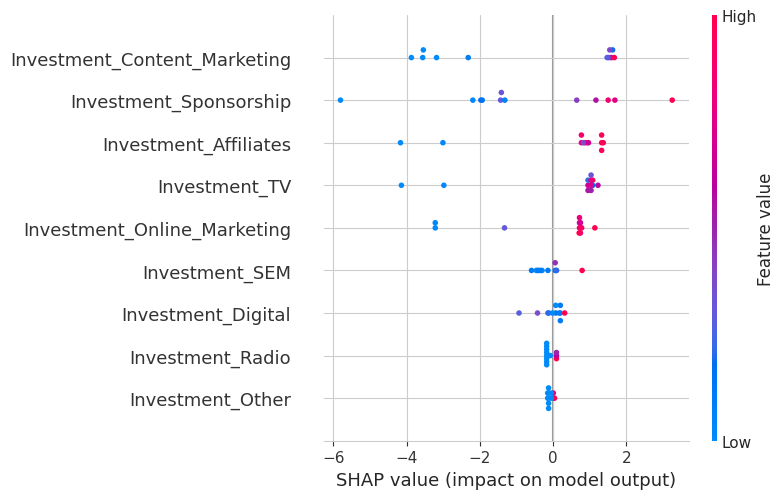

In [34]:
import shap
# Calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

# Plot SHAP summary
shap.summary_plot(shap_values, X)

In [35]:
no_lag_imp = xgb.feature_importances_


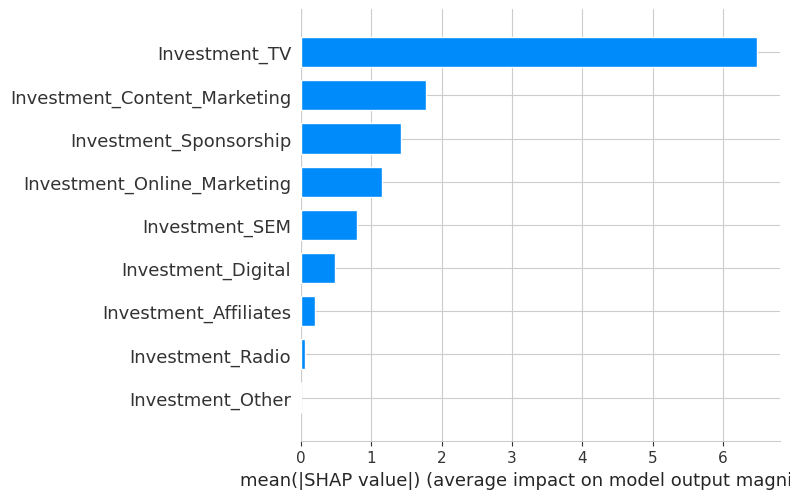

In [36]:
import shap
# Calculate SHAP values
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

# Plot SHAP summary
shap.summary_plot(shap_values, X, plot_type="bar")

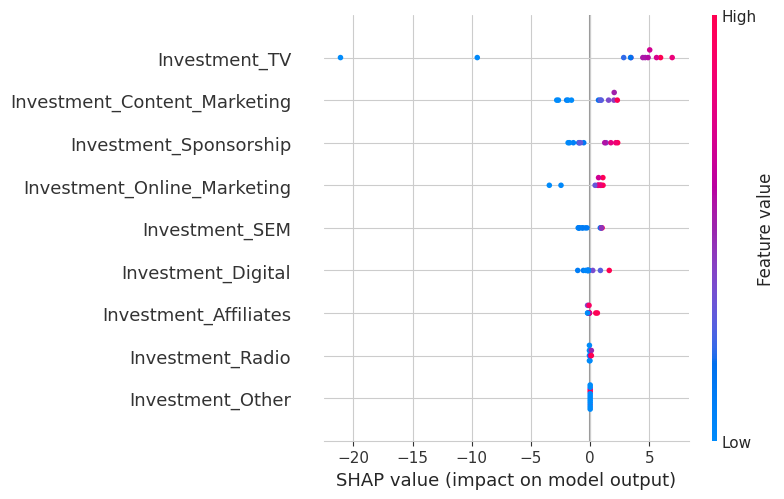

In [37]:
shap.summary_plot(shap_values, X)

In [38]:
avg_shap = shap_values.mean(axis=0)

In [39]:
base_cols = ['Investment_TV',
       'Investment_Digital', 'Investment_Sponsorship',
       'Investment_Content_Marketing', 'Investment_Online_Marketing',
       'Investment_Affiliates', 'Investment_SEM', 'Investment_Radio',
       'Investment_Other']

avg_shap_dict = {}
for i, col in enumerate(base_cols):
  avg_shap_dict[col] = float(avg_shap[i])

In [40]:

lagged_df = monthly_df.copy()

# Create lagged investment columns (shift investment data forward by 1 month)
investment_columns = [col for col in monthly_df.columns if 'Investment' in col]
for col in investment_columns:
    lagged_df[f'{col}_Lag1'] = monthly_df[col].shift(1)

# Drop the original investment columns
lagged_df = lagged_df.drop(columns=investment_columns)

# Remove the first row since it won't have lagged investment data
lagged_df = lagged_df.dropna()

# Rename columns for clarity
lagged_df = lagged_df.rename(columns={
    'Monthly_GMV': 'Current_Month_GMV',
    'Monthly_Investment_Lag1': 'Previous_Month_Total_Investment',
    'Investment_TV_Lag1': 'Previous_Month_TV',
    'Investment_Digital_Lag1': 'Previous_Month_Digital',
    'Investment_Sponsorship_Lag1': 'Previous_Month_Sponsorship',
    'Investment_Content_Marketing_Lag1': 'Previous_Month_Content_Marketing',
    'Investment_Online_Marketing_Lag1': 'Previous_Month_Online_Marketing',
    'Investment_Affiliates_Lag1': 'Previous_Month_Affiliates',
    'Investment_SEM_Lag1': 'Previous_Month_SEM',
    'Investment_Radio_Lag1': 'Previous_Month_Radio',
    'Investment_Other_Lag1': 'Previous_Month_Other'
})

print("Shape of the lagged dataset:", lagged_df.shape)
print("\nMonths included in the lagged dataset:")
print(lagged_df.index.strftime('%Y-%m').tolist())
print("\nFirst few rows of the lagged dataset:")
print(lagged_df.head())

# Optional: Calculate correlation between current GMV and previous month's investments
correlations = lagged_df.corr()['Current_Month_GMV'].sort_values(ascending=False)
print("\nCorrelations with Current Month GMV:")
print(correlations)



Shape of the lagged dataset: (11, 11)

Months included in the lagged dataset:
['2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06']

First few rows of the lagged dataset:
            Current_Month_GMV  Previous_Month_Total_Investment  \
2023-08-01           0.041610                             16.9   
2023-09-01          42.176069                              5.1   
2023-10-01          50.272792                             96.3   
2023-11-01          33.138697                            170.1   
2023-12-01          43.582026                             51.3   

            Previous_Month_TV  Previous_Month_Digital  \
2023-08-01                0.2                     2.5   
2023-09-01                0.0                     1.3   
2023-10-01                3.9                     1.4   
2023-11-01                6.1                    12.6   
2023-12-01                4.2                     1.3   

            Previous_

In [41]:
lagged_df.columns

Index(['Current_Month_GMV', 'Previous_Month_Total_Investment',
       'Previous_Month_TV', 'Previous_Month_Digital',
       'Previous_Month_Sponsorship', 'Previous_Month_Content_Marketing',
       'Previous_Month_Online_Marketing', 'Previous_Month_Affiliates',
       'Previous_Month_SEM', 'Previous_Month_Radio', 'Previous_Month_Other'],
      dtype='object')

In [42]:
lag_X = lagged_df[['Previous_Month_TV', 'Previous_Month_Digital',
       'Previous_Month_Sponsorship', 'Previous_Month_Content_Marketing',
       'Previous_Month_Online_Marketing', 'Previous_Month_Affiliates',
       'Previous_Month_SEM', 'Previous_Month_Radio', 'Previous_Month_Other']]
lag_y = lagged_df['Current_Month_GMV']

In [43]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


# Initialize XGBoost regressor with specific parameters
lag_model = XGBRegressor(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
lag_model.fit(lag_X, lag_y)

# Evaluate the model
train_score = lag_model.score(lag_X, lag_y)

print("R-squared score on training set:", train_score)

R-squared score on training set: 0.9903980357124372


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Initialize Random Forest regressor with specific parameters
lag_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1  # use all available cores
)

# Fit the model
lag_model.fit(lag_X, lag_y)

# Make predictions
y_pred = lag_model.predict(lag_X)

# Calculate various metrics
r2 = r2_score(lag_y, y_pred)


print("R-squared score:", r2)

R-squared score: 0.7516929648610317


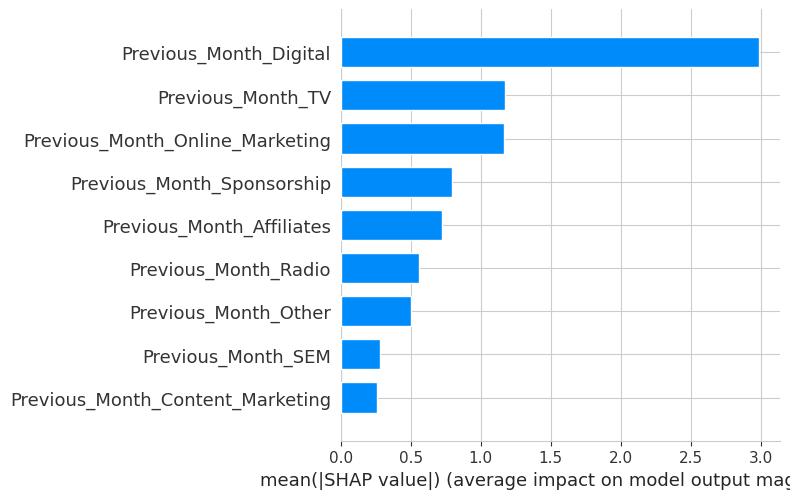

In [45]:
explainer = shap.TreeExplainer(lag_model)
lag_shap_values = explainer.shap_values(lag_X)

# Plot SHAP summary
shap.summary_plot(lag_shap_values, lag_X, plot_type="bar")

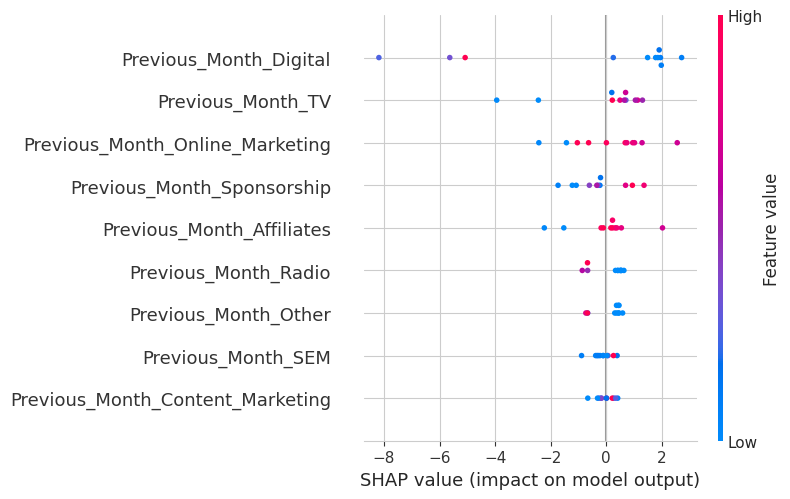

In [46]:
shap.summary_plot(lag_shap_values, lag_X)

In [47]:
avg_lag_shap = lag_shap_values.mean(axis=0)

In [48]:
base_cols = ['Previous_Month_TV', 'Previous_Month_Digital',
       'Previous_Month_Sponsorship', 'Previous_Month_Content_Marketing',
       'Previous_Month_Online_Marketing', 'Previous_Month_Affiliates',
       'Previous_Month_SEM', 'Previous_Month_Radio', 'Previous_Month_Other']

avg_lag_shap_dict = {}
for i, col in enumerate(base_cols):
  avg_lag_shap_dict[col] = float(avg_lag_shap[i])

In [49]:
lag_imp = lag_model.feature_importances_
rel_imp = lag_imp / (no_lag_imp + lag_imp)

In [50]:
base_cols = ['Investment_TV',
       'Investment_Digital', 'Investment_Sponsorship',
       'Investment_Content_Marketing', 'Investment_Online_Marketing',
       'Investment_Affiliates', 'Investment_SEM', 'Investment_Radio',
       'Investment_Other']
imp_coef = {}
for i, col in enumerate(base_cols):
  if col == 'Investment_Other':
    imp_coef[col] = 0.0
  else:
    imp_coef[col] = float(rel_imp[i])

In [51]:
import pandas as pd
df = pd.read_csv("monthly.csv")

In [52]:
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution

marketing_channels = ["TV", "Digital", "Sponsorship", "Content_Marketing", "Online_Marketing", "Affiliates", "SEM", "Radio", "Other"]

avg_shap = {
    'Investment_TV': 0.13781894445419312,
    'Investment_Digital': -0.03181426227092743,
    'Investment_Sponsorship': 0.04355574771761894,
    'Investment_Content_Marketing': -0.048393070697784424,
    'Investment_Online_Marketing': 0.17023783922195435,
    'Investment_Affiliates': -0.02272087335586548,
    'Investment_SEM': -0.1755017787218094,
    'Investment_Radio': -0.012624693103134632,
    'Investment_Other': 0.0
}

lag_coeff = {
    'Investment_TV': 0.0040247780084609985,
    'Investment_Digital': 0.009798157811164856,
    'Investment_Sponsorship': 0.0017198550701141357,
    'Investment_Content_Marketing': 0.0010626080632209778,
    'Investment_Online_Marketing': 0.0013112406432628632,
    'Investment_Affiliates': 0.006546753644943237,
    'Investment_SEM': 0.0018961219489574432,
    'Investment_Radio': 0.008590822219848633,
    'Investment_Other': 0.0
}

lag_values = np.array(list(lag_coeff.values()))
min_lag, max_lag = lag_values.min(), lag_values.max()
normalized_lag = {
    k: (v - min_lag) / (max_lag - min_lag + 1e-6)
    for k, v in lag_coeff.items()
}

shap_array = np.array([avg_shap[f"Investment_{ch}"] for ch in marketing_channels])
lag_array = np.array([normalized_lag[f"Investment_{ch}"] for ch in marketing_channels])
effective_shap = shap_array * (1 / (1 + 1e-6))

initial_allocation = {channel: df[channel].sum() for channel in marketing_channels}
initial_values = np.array([initial_allocation[channel] for channel in marketing_channels])
initial_gmv = df["gmv"].sum()
total_budget = sum(initial_values)

bounds = [
    (35.52, 53.28), (23.84, 35.76), (292.32, 438.48), (5.92, 8.88),
    (154.96, 232.44), (50.72, 76.08), (72.88, 109.32), (3.76, 5.64), (38.40, 57.60)
]

def objective(allocation):
    allocation = np.array(allocation)
    budget_changes = allocation - initial_values
    shap_lag_effect = (budget_changes * effective_shap) / initial_values
    gmv_multiplier = np.prod(1 + shap_lag_effect)
    predicted_gmv = initial_gmv * gmv_multiplier

    budget_diff = abs(np.sum(allocation) - total_budget)
    penalty = 1e6 * budget_diff

    return -predicted_gmv + penalty

# Run optimization
print("Running Differential Evolution...")
result = differential_evolution(
    objective,
    bounds,
    strategy='best1bin',
    maxiter=1000,
    popsize=20,
    mutation=(0.5, 1),
    recombination=0.7,
    seed=42
)

# Extract and format results
optimized_values = result.x
optimal_allocations = dict(zip(marketing_channels, optimized_values))
optimal_allocations["Total_Investment"] = sum(optimized_values)
optimal_allocations["Predicted_GMV"] = -result.fun

comparison_df = pd.DataFrame({
    "Marketing Channel": marketing_channels + ["Total_Investment", "Predicted_GMV"],
    "Initial Allocation": list(initial_values) + [total_budget, initial_gmv],
    "Optimized Allocation": list(optimized_values) + [optimal_allocations["Total_Investment"], optimal_allocations["Predicted_GMV"]]
})

print("\n=== Budget Allocation Comparison ===")
print(comparison_df)

print(f"\nInitial Total GMV: {initial_gmv:,.2f}")
print(f"Optimized Predicted GMV: {optimal_allocations['Predicted_GMV']:,.2f}")


Running Differential Evolution...

=== Budget Allocation Comparison ===
    Marketing Channel  Initial Allocation  Optimized Allocation
0                  TV        4.440000e+01          5.328000e+01
1             Digital        2.980000e+01          2.384000e+01
2         Sponsorship        3.654000e+02          3.666600e+02
3   Content_Marketing        7.400000e+00          5.920000e+00
4    Online_Marketing        1.937000e+02          2.324400e+02
5          Affiliates        6.340000e+01          5.072000e+01
6                 SEM        9.110000e+01          7.288000e+01
7               Radio        4.700000e+00          3.760000e+00
8               Other        4.800000e+01          3.840000e+01
9    Total_Investment        8.479000e+02          8.479000e+02
10      Predicted_GMV        4.045866e+09          4.554182e+09

Initial Total GMV: 4,045,865,516.71
Optimized Predicted GMV: 4,554,181,775.86


In [53]:
print("Percentage Increase in Budget : ", (initial_gmv - optimal_allocations['Predicted_GMV']) / initial_gmv)

Percentage Increase in Budget :  -0.12563844671750748


In [54]:
df = pd.read_csv(r"monthly.csv")

In [55]:
df = df.fillna(0)

In [56]:
channels = ['TV', 'Digital', 'Sponsorship', 'Content_Marketing',
            'Online_Marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

In [57]:
df['reverse_efficiency'] = df['gmv'] / df['Total_Investment']

In [58]:
total_efficiency = df['reverse_efficiency'].sum()
df['W_m'] = df['reverse_efficiency'] / total_efficiency

In [59]:
for channel in channels:
    df[f'r_{channel}'] = df[channel] / df['Total_Investment']


In [60]:
correlations = {}
for channel in channels:
    correlations[channel] = df['in_sale'].corr(df[channel])

corr_series = pd.Series(correlations)
avg_corr = corr_series.mean()


In [61]:
alpha = 0.5

for channel in channels:
    df[f'adj_r_{channel}'] = df[f'r_{channel}'] * (1 + alpha * (correlations[channel] - avg_corr))

adj_cols = [f'adj_r_{ch}' for ch in channels]
df['sum_adj'] = df[adj_cols].sum(axis=1)
for channel in channels:
    df[f'W_{channel}'] = df[f'adj_r_{channel}'] / df['sum_adj']


In [62]:
channel_budget = {
    'TV': 53.28,
    'Digital': 35.76,
    'Sponsorship': 438.48,
    'Content_Marketing': 8.88,
    'Online_Marketing': 232.44,
    'Affiliates': 76.08,
    'SEM': 109.32,
    'Radio': 5.64,
    'Other': 57.6
}

In [63]:
allocation = pd.DataFrame({'YM': df['YM']})
for channel in channels:

    allocation[f'F_{channel}'] = df['W_m'] * df[f'W_{channel}']

    total_fraction = allocation[f'F_{channel}'].sum()
    allocation[f'F_{channel}'] = allocation[f'F_{channel}'] / total_fraction

    allocation[channel] = channel_budget[channel] * allocation[f'F_{channel}']

final_allocation = allocation[['YM'] + channels]


In [64]:
print("Global Channel Correlations with in_sale:")
print(corr_series)


Global Channel Correlations with in_sale:
TV                   0.407942
Digital              0.608733
Sponsorship          0.348574
Content_Marketing    0.687864
Online_Marketing     0.594200
Affiliates           0.570804
SEM                  0.668008
Radio                0.129318
Other                0.040143
dtype: float64


In [65]:
print("\nMonthly Allocation Fractions per Channel:")
print(allocation[[col for col in allocation.columns if col.startswith('F_')]])


Monthly Allocation Fractions per Channel:
        F_TV  F_Digital  F_Sponsorship  F_Content_Marketing  \
0   0.047354   0.132432       0.087970             0.232218   
1   0.185778   0.077854       0.084034             0.077833   
2   0.055364   0.043032       0.077774             0.099223   
3   0.023759   0.402104       0.117613             0.000000   
4   0.000000   0.008044       0.000673             0.000000   
5   0.070020   0.034031       0.150846             0.094775   
6   0.106757   0.016425       0.013634             0.192120   
7   0.108130   0.106984       0.065099             0.219538   
8   0.148506   0.045402       0.088874             0.084294   
9   0.160021   0.037498       0.100046             0.000000   
10  0.026258   0.020315       0.079545             0.000000   
11  0.068053   0.075878       0.133892             0.000000   

    F_Online_Marketing  F_Affiliates     F_SEM   F_Radio   F_Other  
0             0.040422      0.035058  0.117660  0.000000  0.000000  

In [66]:
print("\nFinal Monthly Budget Allocation per Channel:")
print(final_allocation)


Final Monthly Budget Allocation per Channel:
             YM        TV    Digital  Sponsorship  Content_Marketing  \
0   2023.0-10.0  2.523040   4.735779    38.572942           2.062092   
1   2023.0-11.0  9.898260   2.784066    36.847073           0.691153   
2   2023.0-12.0  2.949794   1.538814    34.102492           0.881101   
3    2023.0-7.0  1.265899  14.379233    51.571043           0.000000   
4    2023.0-8.0  0.000000   0.287668     0.294930           0.000000   
5    2023.0-9.0  3.730644   1.216953    66.143003           0.841599   
6    2024.0-1.0  5.688006   0.587360     5.978081           1.706023   
7    2024.0-2.0  5.761158   3.825751    28.544828           1.949497   
8    2024.0-3.0  7.912396   1.623570    38.969381           0.748534   
9    2024.0-4.0  8.525929   1.340934    43.868194           0.000000   
10   2024.0-5.0  1.399031   0.726467    34.878966           0.000000   
11   2024.0-6.0  3.625843   2.713406    58.709067           0.000000   

    Online_Market